In [77]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from IPython.display import display, HTML
import numpy as np
import json
from scipy import stats
import math

from datetime import datetime
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

In [92]:
root = '../data_storage'
file_names = []
dates = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))
        
        datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
        dates.append(datetime_object)
        
youngest = max(dates)

for file in files:
    datetime_object = datetime.strptime(file[5:-9], '%d %b %Y %H:%M:%S')
    if(datetime_object == youngest):
        youngest = '../data_storage/' + file

In [96]:
main_frame = pd.DataFrame()

for f in file_names:
    df = pd.read_json(f)
    main_frame = main_frame.append(df)
    
youngest_frame = pd.read_json(youngest)

In [22]:
main_frame

,hospital,contact,fed,icu_low_care,icu_high_care,updated,ecmo
0,"Dreifaltigkeits-Krankenhaus Wesseling, Anästhe...",Intensivstation Website,NRW,green,yellow,"26.03.2020, 18:00",NaN
1,Klinikum Bamberg Medizinische Klinik I/Intensi...,Intensivstation II Website,BY,green,green,"26.03.2020, 19:44",green
2,"Klinikum Altmühlfranken Gunzenhausen, Albert-S...",Website,BY,red,yellow,"26.03.2020, 16:55",NaN
3,Kliniken der Stadt Köln gGmbH - Krankenhaus Me...,ITS 115i Website,NRW,green,green,"26.03.2020, 16:41",NaN
4,"Marien Hospital Düsseldorf, Innere Medizin / A...",Interdisziplinäre Intensivstation Website,NRW,green,green,"26.03.2020, 16:03",NaN
...,...,...,...,...,...,...,...
690,"Universitätsklinikum Gießen / Marburg, Rudolf-...",Website,HE,green,green,"18.03.2020, 14:01",green
691,"Universitätsklinikum Dresden, Klinik für Anäst...",ARDS/ECMO Zentrum Dresden (ANE-ITS) Website,SN,green,green,"25.03.2020, 13:56",green
692,"Universitätsklinikum Bonn, Klinik und Poliklin...",Operative Intensivmedizin Website,NRW,green,green,"25.03.2020, 13:17",green
693,"Helios Klinikum Bad Saarow, Klinik für Anästhe...","ITS 1, ITS 2, ITS 3 Website",BB,yellow,green,"27.03.2020, 06:44",green


# Anzahl der Krankenhäuser pro Bundesland

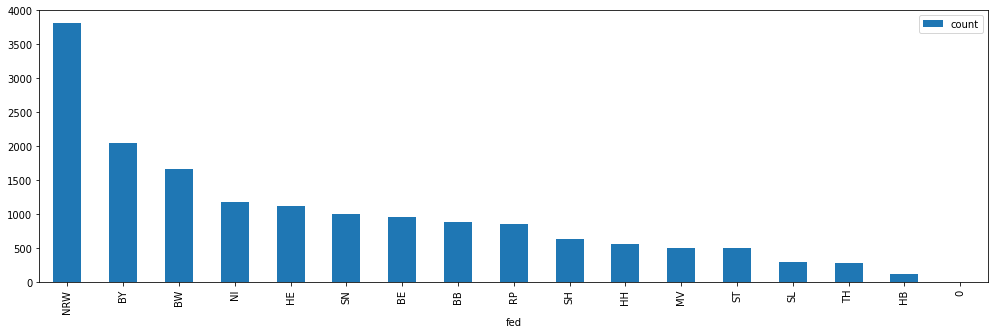

In [26]:
fed_count = pd.DataFrame({'count' : main_frame.groupby('fed').count()['hospital']}).reset_index()
fed_count = fed_count.sort_values(by=['count'], ascending=False)
fed_count = fed_count.set_index('fed')

fed_count.plot(kind='bar')

# Anzahl der Betten - Intensivbetten ohne invasive Beatmungsmöglichkeit (Monitoring, Überwachung, ggf. nicht-invasive Beatmung möglich)

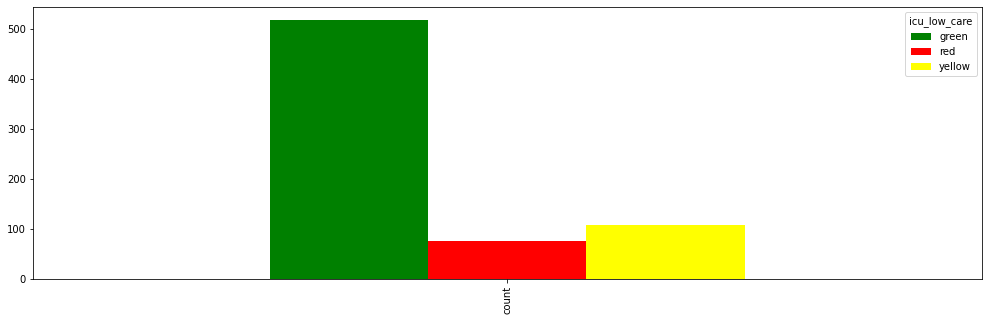

In [97]:
status_icu_low_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_low_care').count()['hospital']}).reset_index()
status_icu_low_care_count  = status_icu_low_care_count.set_index('icu_low_care')

status_icu_low_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])

# Anzahl der Betten - Intensivbetten mit invasiver Beatmungsmöglichkeit (Beatmungsbetten)

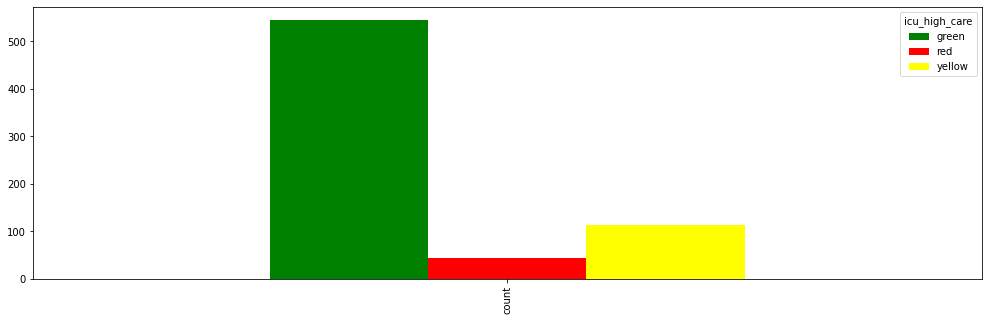

In [98]:
status_icu_high_care_count = pd.DataFrame({'count' : youngest_frame.groupby('icu_high_care').count()['hospital']}).reset_index()
status_icu_high_care_count  = status_icu_high_care_count.set_index('icu_high_care')

status_icu_high_care_count.transpose().plot(kind="bar", color=['green', 'red', 'yellow'])

